In [122]:
#Import package

import numpy as np
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
#Import PY-file

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from pw import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
%reload_ext

UsageError: Missing module name.


# Question 1

In [125]:
model = HouseholdSpecializationModelClass()

par = model.par

list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Here we solve for the relationship between the hours for male and female for the different values of alpha and sigma

for i in list_sigma:
    par.sigma = i
    for j in list_alpha:
        par.alpha = j
        opt = model.solve_discrete()
        
        relative_hours = opt.HF/opt.HM
        print(f' sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}, H_F / H_M will be equal to: {relative_hours:.2f}')


 sigma = 0.50 and alpha = 0.25, H_F / H_M will be equal to: 0.55
 sigma = 0.50 and alpha = 0.50, H_F / H_M will be equal to: 1.00
 sigma = 0.50 and alpha = 0.75, H_F / H_M will be equal to: 1.83
 sigma = 1.00 and alpha = 0.25, H_F / H_M will be equal to: 0.31
 sigma = 1.00 and alpha = 0.50, H_F / H_M will be equal to: 1.00
 sigma = 1.00 and alpha = 0.75, H_F / H_M will be equal to: 3.25
 sigma = 1.50 and alpha = 0.25, H_F / H_M will be equal to: 0.21
 sigma = 1.50 and alpha = 0.50, H_F / H_M will be equal to: 1.00
 sigma = 1.50 and alpha = 0.75, H_F / H_M will be equal to: 4.67


To make this a bit more easier to read, we create a table instead. The tabel will repport the same values as above, but in a nicer way. We will create the table by creating a list for the alpha values and a list for the sigma values, and then loop over these:

In [126]:
#Calculating a table with optimal relative hours worked at home 
model_1 = HouseholdSpecializationModelClass()
par = model_1.par
sol = model_1.sol

#List of paramters to solve for 
list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

#Empty list to store the relative wage values
table_data = []

#Loop alpha values
for alpha in list_alpha:
    # row list for the current alpha value
    row_data = []
    
    #Loop  sigma values
    for sigma in list_sigma:
        # parameter values
        par.alpha = alpha
        par.sigma = sigma
        
        #Solve for optimal solution
        opt = model_1.solve_discrete()
        
        #Calculate relative wage and append to row list
        relative_wage = opt.HF / opt.HM
        row_data.append(relative_wage)
    
    #Append the row list to the table data list
    table_data.append(row_data)

#Create a pandas DataFrame from the table data
table = pd.DataFrame(table_data, index=list_alpha, columns=list_sigma)

#Print the table
print(table)
print("note that (0.25, 0.50, and 0.75) are alpha values and (0.5, 1.0, and 1.5) are sigma values")

           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50  1.000000  1.000000  1.000000
0.75  1.833333  3.250000  4.666667
note that (0.25, 0.50, and 0.75) are alpha values and (0.5, 1.0, and 1.5) are sigma values


Comments on the results: When alpha goes up the relationship between HF and HM will also go up (for a given value of sigma). The intuion is, that the relationship in productivity at home between women and men (given by alpha/(1-alpha)) is increasing in alpha. In other words, when alpha goes up, the women become more productive in the home and will undertake more housewotk.

# Question 2

In [127]:
model_2 = HouseholdSpecializationModelClass()

par = model_2.par

results_q2 = []

#Here we solve the model dicretly for different relationships between WF og WM 
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q2 = np.append(results_q2, log_relative_h)
    print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF / HM) {relative_hours:3f}')

For a relative wage ratio of 0.800000 the optimal relative hours at home are (HF / HM) 1.250000
For a relative wage ratio of 0.900000 the optimal relative hours at home are (HF / HM) 1.000000
For a relative wage ratio of 1.000000 the optimal relative hours at home are (HF / HM) 1.000000
For a relative wage ratio of 1.100000 the optimal relative hours at home are (HF / HM) 0.888889
For a relative wage ratio of 1.200000 the optimal relative hours at home are (HF / HM) 0.800000


We now construct a figure displaying the results above

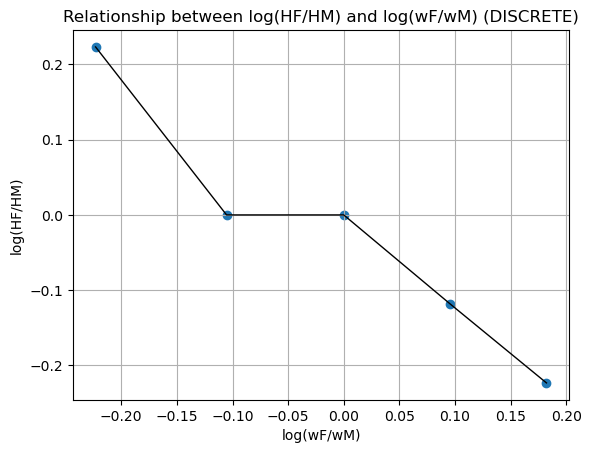

In [128]:
#Create figure
fig = plt.figure()
#Create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_q2, color='black', lw=1)
ax.scatter(np.log(par.wF_vec), results_q2)
#Alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relationship between log(HF/HM) and log(wF/wM) (DISCRETE)")
plt.show()

Comments on the result: In line with our expectations, the ratio of female hours worked (HF) to male hours worked (HM) will decrease as the ratio of female wages (WF) to male wages (WM) increases. In other words, when a woman's wage increases, her domestic production will decrease. This happens because the woman can now earn more money by working, and the opportunity cost of domestic work is higher. The overall utility increases if the woman works more and earns a wage (which can be used for consumption) instead of engaging in domestic production. The breakpoint around log(HF/HM)=0 occurs because the model is discretely formulated here.

# Question 3

As we now must solve the model in a continuously setting the setup is rather equivalent to Q2. We will skip the part of printing the relative hours and just jump directly to plotting, as we think this is the best whey to show, how the relative hours look in a continuously setting.
If one would like to se the exact values, these can easily be printet with #print(relative_wage) and #print(relative_hours)

Text(0.5, 1.0, 'Relationship between log(HF / HM) and log(wF / wM) (CONTINUOUSLY)')

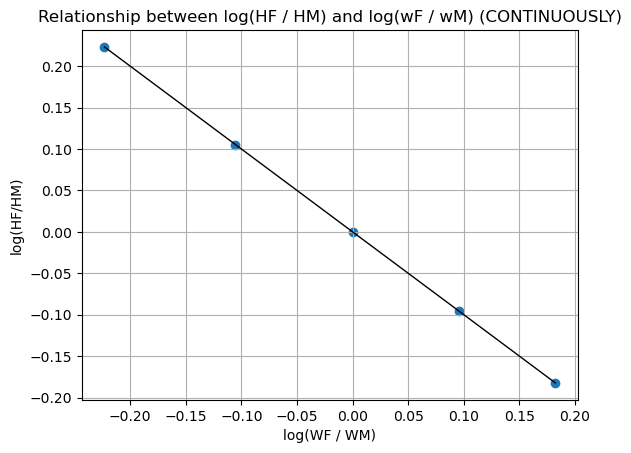

In [129]:
#Create figure
model_3 = HouseholdSpecializationModelClass()
par = model_3.par
sol = model_3.sol

model_3.solve_wF_vec_2

relative_hours = np.log(model_3.solve_wF_vec() )
relative_wage = np.log(par.wF_vec / par.wM)


fig = plt.figure()
#Create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=1)
ax.scatter(relative_wage, relative_hours)
#Alterations to figure
ax.grid(True)
plt.xlabel('log(WF / WM)')
plt.ylabel('log(HF/HM)')
ax.set_title("Relationship between log(HF / HM) and log(wF / wM) (CONTINUOUSLY)")

Comments on the result: We observe the same trend as in the discrete case. However, there is no "breakpoint" around log(HF/HM)=0 since the agent can now choose its time continuously instead of discretely.

# Question 4

In [130]:
model_4 =HouseholdSpecializationModelClass()

par = model_4.par
sol = model_4.sol

def obj(q):
    par.alpha, par.sigma = q

    model_4.solve_wF_vec_2()
    model_4.run_regression()

    err =  (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2
    return err


bounds = [(0, 0.99),(0.01, 2)]
initial_guess = (0.5, 1)

reg_opt = optimize.minimize(obj, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001)


alpha_hat = reg_opt.x[0]
sigma_hat = reg_opt.x[1]

err = obj(reg_opt.x)



print (f'Minimizing the squared errrors gives the regression:')
print(f"    Beta0_hat =  {sol.beta0:.2f}")
print(f"    Beta1_hat =  {sol.beta1:.2f}")

print(f'This gives the parameters: \n    alpha = {alpha_hat:.2f} \n    sigma = {sigma_hat:.2f}')
print(f' With the squared error {err:.2f}')

/Users/philiprefslund/Desktop/pw.py:67: RuntimeWarning: overflow encountered in scalar power
  inner = (1-par.alpha)*HM**((par.sigma-1)/par.sigma) +par.alpha*HF**((par.sigma-1)/par.sigma)


Minimizing the squared errrors gives the regression:
    Beta0_hat =  0.40
    Beta1_hat =  -0.10
This gives the parameters: 
    alpha = 0.98 
    sigma = 0.10
 With the squared error 0.00


Here is an estimation of how it looks in our case. Beta0_hat=0.40 fits well with Beta0=0.4, and Beta1_hat=-0.10 aligns with Beta1=-0.10.

Comments on the results: Beta0_hat=Beta0=0.40 indicates that, as a baseline, HF is larger than HM.

For Beta1_hat=Beta1=-0.1, a 10% increase in the ratio WF/WM leads to a 1% decrease in the ratio HF/HM (i.e., 1 to 10). Therefore, if the woman starts earning more, the relative workload in the household shifts by 1/10th of the magnitude by which the wage ratio has changed.

# Question 5